## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [25]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [26]:
X.shape

(50,)

In [27]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

In [5]:
y.shape

(50,)

### Plot X vs. y

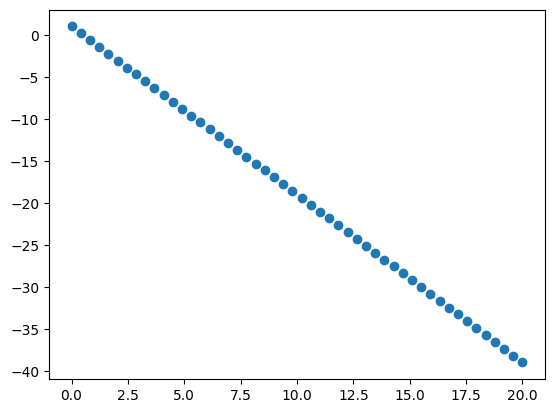

In [6]:
plt.scatter(X,y)

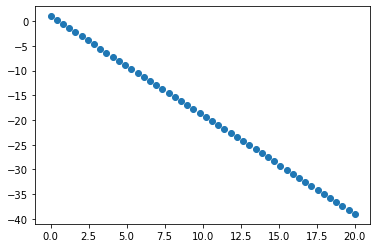

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [53]:
def GD(x,y,alpha,max_itr,gradient_tolerance,cost_tolerance):
  theta_1 = 0
  theta_0 = 0
  cost_array = []
  w_array = []
  y_predict_val = []
  errors = []
  count = 0

  for i in range(max_itr):
    y_predict = theta_0 + theta_1*x
    y_predict_val.append(y_predict)
    error = y_predict - y
    errors.append(error)
    j = 1/(2*len(y)) * np.sum(error**2)
    cost_array.append(j)
    w_array.append([[theta_0],[theta_1]])
    gradient_theta_0 = 1/len(y) * np.sum(error)
    gradient_theta_1 = 1/len(y)* np.dot(error,X)
    theta_0 = theta_0 - (alpha*gradient_theta_0)
    theta_1 = theta_1 - (alpha*gradient_theta_1)
    gradient_vector = np.array([[gradient_theta_0],[gradient_theta_1]])
    norm_gradient = np.linalg.norm(gradient_vector)

    print('****************** Iteration '+str(i)+' ********************')
    print('h(x): '+ str(y_predict))
    print('')
    print('')
    print('Error vector '+ str(error))
    print('')
    print('')
    print('j= '+ str(j))
    print('')
    print('')
    print('Gradient Vector: '+str(gradient_vector))
    print('')
    print('')
    print('Gradient Vector Norm: '+str(norm_gradient))
    print('')
    print('')
    print('theta_0: '+str(theta_0))
    print('theta_1: '+str(theta_1))

    if norm_gradient<gradient_tolerance :
      break
    if i>0:
      cost_conv = abs(cost_array[-1]-cost_array[-2])

      if cost_conv < cost_tolerance and count>10:
        break

      elif cost_conv < cost_tolerance and count <= 10:
        count+=1
      else:
        count = 0
  return w_array,cost_array,y_predict_val,w_vector,y_predict

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [54]:
w_array,cost_array,y_predict_val,w_vector,y_predict = GD(X,y,0.0005,300,0.001,0.001)

****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Error vector [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]


j= 249.88775510204087


Gradient Vector: [[ 19.       ]
 [259.3877551]]


Gradient Vector Norm: 260.08269357432516


theta_0: -0.0095
theta_1: -0.1296938775510204

#### Calculate r2 score

el accuracy bta3ty a3la

In [55]:
r2_score(y,y_predict)

0.997612782560833

r2_score: 0.9975395965150151


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

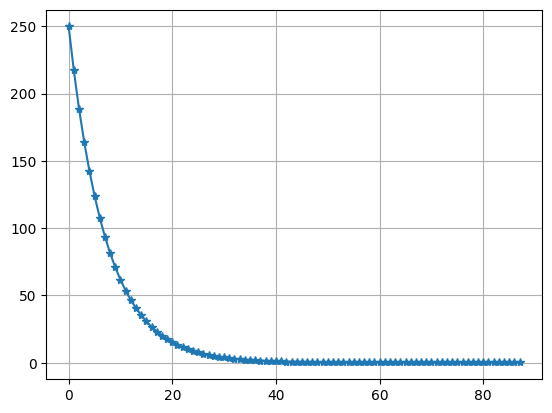

In [56]:
plt.plot(np.arange(len(cost_array)),cost_array,marker='*')
plt.grid(True);

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

In [57]:
w_array=np.array(w_array)

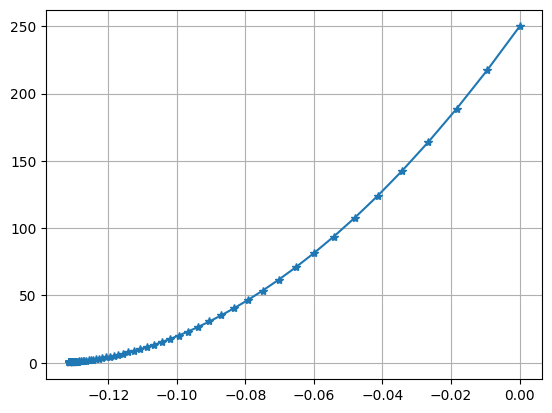

In [58]:
plt.plot(w_array[:,0],cost_array,marker='*')
plt.grid(True);

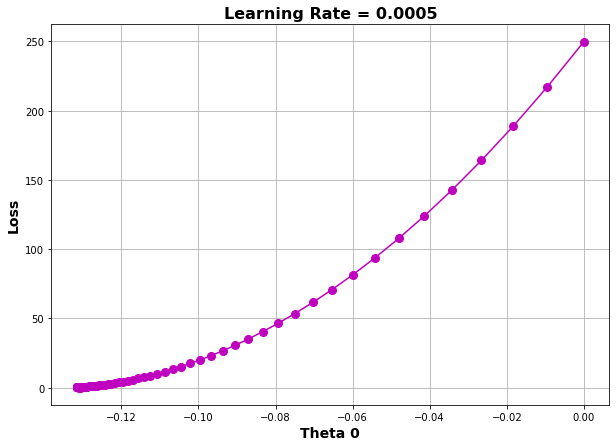

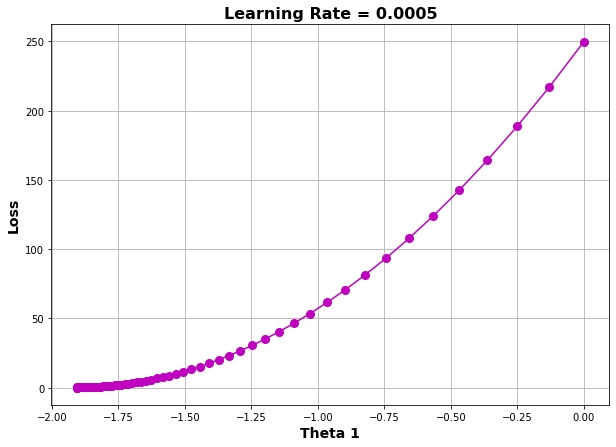

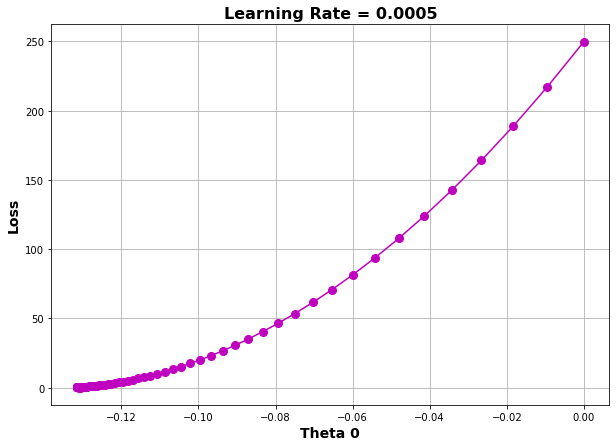

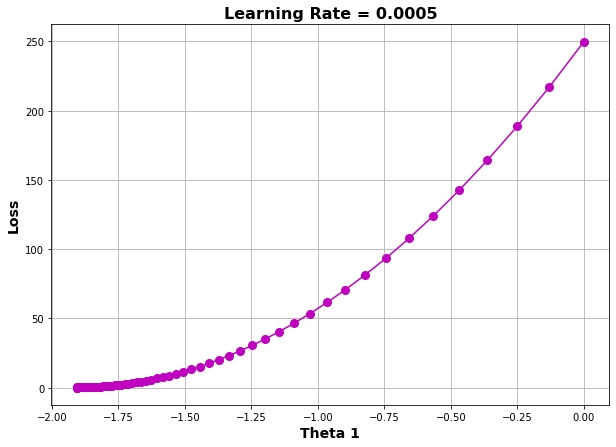

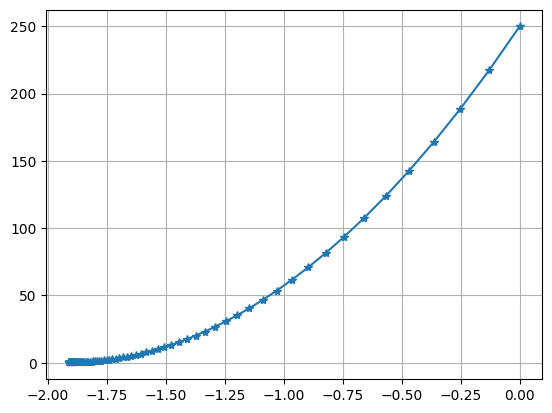

In [59]:
plt.plot(w_array[:,1],cost_array,marker='*')
plt.grid(True);

#### Plot all regression lines till converge

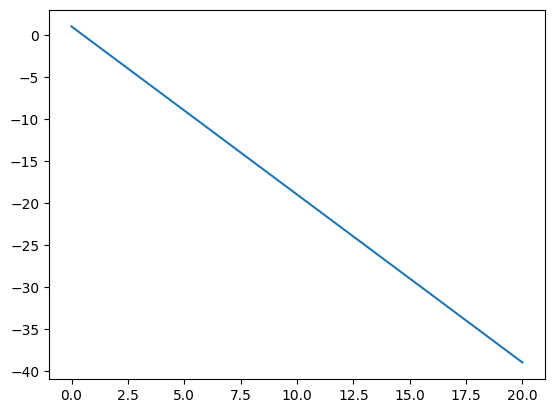

In [67]:
plt.plot(X,y)

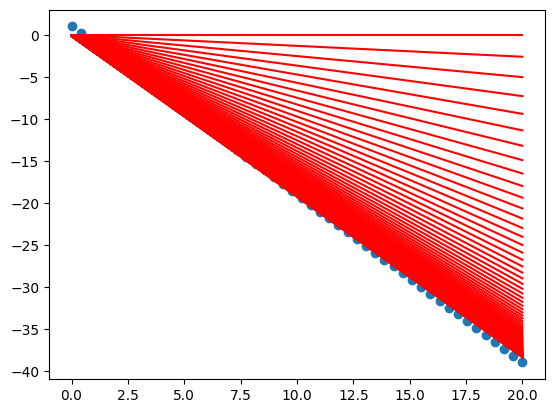

In [66]:
plt.scatter(X,y)
for i in y_predict_val:
  plt.plot(X,i,color='red')
plt.show();

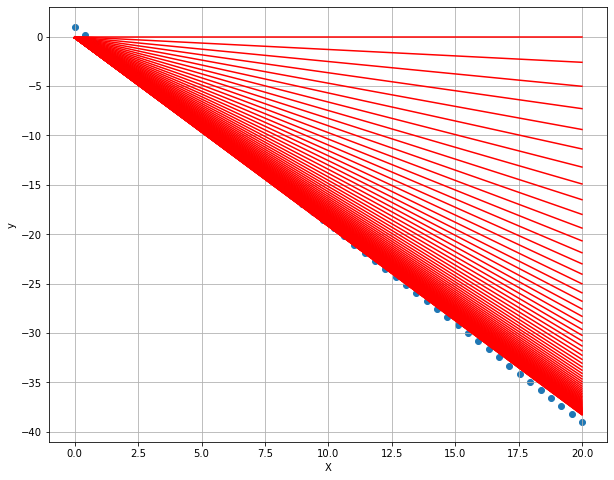

#### Plot the best regression line

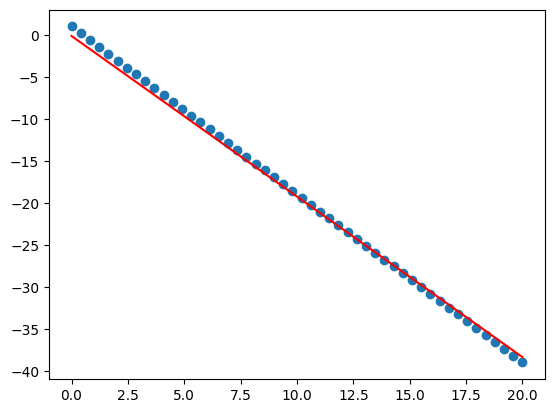

In [71]:
plt.scatter(X,y)
plt.plot(X,y_predict,color='red')

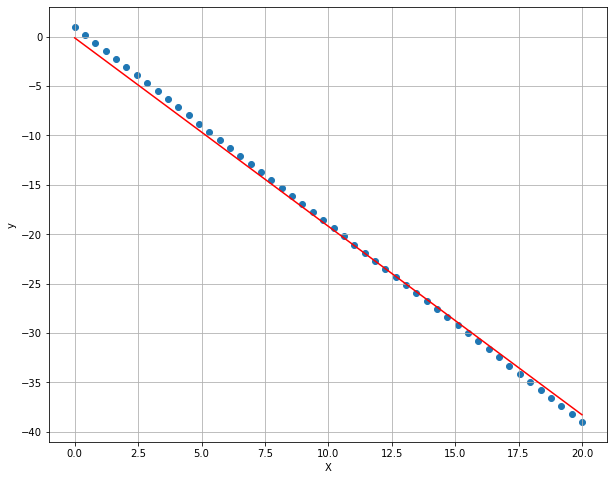

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [72]:
w_array,cost_array,y_predict_val,w_vector,y_predict = GD(X,y,0.00005,1000,0.001,0.001)

Streaming output truncated to the last 5000 lines.


theta_0: -0.12984485188115574
theta_1: -1.8390805271322634
****************** Iteration 474 ********************
h(x): [ -0.12984485  -0.88048996  -1.63113508  -2.38178019  -3.1324253
  -3.88307042  -4.63371553  -5.38436064  -6.13500576  -6.88565087
  -7.63629598  -8.3869411   -9.13758621  -9.88823132 -10.63887644
 -11.38952155 -12.14016666 -12.89081177 -13.64145689 -14.392102
 -15.14274711 -15.89339223 -16.64403734 -17.39468245 -18.14532757
 -18.89597268 -19.64661779 -20.39726291 -21.14790802 -21.89855313
 -22.64919825 -23.39984336 -24.15048847 -24.90113358 -25.6517787
 -26.40242381 -27.15306892 -27.90371404 -28.65435915 -29.40500426
 -30.15564938 -30.90629449 -31.6569396  -32.40758472 -33.15822983
 -33.90887494 -34.65952006 -35.41016517 -36.16081028 -36.91145539]


Error vector [-1.12984485 -1.06416343 -0.99848202 -0.9328006  -0.86711918 -0.80143776
 -0.73575635 -0.67007493 -0.60439351 -0.53871209 -0.47303068 -0.40734926
 -0.341667

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.00095
theta_1_new : -0.0129693


Error Vector:
[-1.03616786 -0.42185497  0.19245793  0.80677082  1.42108371  2.0353966
  2.64970949  3.26402238  3.87833527  4.49264817  5.10696106  5.72127395
  6.33558684  6.94989973  7.56421262  8.17852551  8.79283841  9.4071513
 10.02146419 10.63577708 11.25008997 11.86440286 12.47871575 13.09302865
 13.70734154 14.32165443 14.93596732 15.55028021 16.1645931  16.77890599
 17.39321889 18.00753178 18.62184467 19.23615756 19.85047045 20.46478334
 21.07909623 21.69340913 22.30772202 22.92203491 23.5363478  24.15066069
 24.76497358 25.37928647 25.99359937 26.60791226 27.22222515 27.83653804
 28.45085093 29.06516382]

j = 137.49780357676352

Gradient Vector:
[[ 14.01449798]
 [192.36157561]]

Gradient Vector Norm:
192.8714129238948

theta_0_new : -0.03686858155519533
theta_1_new : -0.5045514947736295

****************** Iteration 45 ********************

h(x):
[ -0.03686858  -0.24280797  -0.44874735  -0.65468674  -0.86062612
  -1.06656551  -1.2725049   -1.47844428  -1.68438367  -1.8903230


j = 68.83712790496376

Gradient Vector:
[[  9.82460151]
 [136.03098233]]

Gradient Vector Norm:
136.3853032673908

theta_0_new : -0.06685086270355442
theta_1_new : -0.9177054348813832

****************** Iteration 96 ********************

h(x):
[ -0.06685086  -0.44142451  -0.81599816  -1.1905718   -1.56514545
  -1.9397191   -2.31429274  -2.68886639  -3.06344004  -3.43801368
  -3.81258733  -4.18716098  -4.56173463  -4.93630827  -5.31088192
  -5.68545557  -6.06002921  -6.43460286  -6.80917651  -7.18375015
  -7.5583238   -7.93289745  -8.30747109  -8.68204474  -9.05661839
  -9.43119203  -9.80576568 -10.18033933 -10.55491298 -10.92948662
 -11.30406027 -11.67863392 -12.05320756 -12.42778121 -12.80235486
 -13.1769285  -13.55150215 -13.9260758  -14.30064944 -14.67522309
 -15.04979674 -15.42437039 -15.79894403 -16.17351768 -16.54809133
 -16.92266497 -17.29723862 -17.67181227 -18.04638591 -18.42095956]

Error Vector:
[-1.06685086 -0.62509798 -0.1833451   0.25840779  0.70016067  1.14191356
  1.5


j = 31.81571190585062

Gradient Vector:
[[ 6.57608066]
 [92.35572627]]

Gradient Vector Norm:
92.58955130845696

theta_0_new : -0.08984261951516516
theta_1_new : -1.238058338321551

****************** Iteration 153 ********************

h(x):
[ -0.08984262  -0.59517255  -1.10050249  -1.60583242  -2.11116236
  -2.61649229  -3.12182222  -3.62715216  -4.13248209  -4.63781203
  -5.14314196  -5.64847189  -6.15380183  -6.65913176  -7.1644617
  -7.66979163  -8.17512156  -8.6804515   -9.18578143  -9.69111137
 -10.1964413  -10.70177123 -11.20710117 -11.7124311  -12.21776104
 -12.72309097 -13.2284209  -13.73375084 -14.23908077 -14.74441071
 -15.24974064 -15.75507057 -16.26040051 -16.76573044 -17.27106038
 -17.77639031 -18.28172024 -18.78705018 -19.29238011 -19.79771005
 -20.30303998 -20.80836991 -21.31369985 -21.81902978 -22.32435972
 -22.82968965 -23.33501958 -23.84034952 -24.34567945 -24.85100939]

Error Vector:
[-1.08984262 -0.77884602 -0.46784943 -0.15685283  0.15414377  0.46514036
  0.7761

h(x):
[ -0.10315948  -0.68542902  -1.26769856  -1.8499681   -2.43223764
  -3.01450718  -3.59677672  -4.17904625  -4.76131579  -5.34358533
  -5.92585487  -6.50812441  -7.09039395  -7.67266349  -8.25493303
  -8.83720257  -9.41947211 -10.00174165 -10.58401118 -11.16628072
 -11.74855026 -12.3308198  -12.91308934 -13.49535888 -14.07762842
 -14.65989796 -15.2421675  -15.82443704 -16.40670658 -16.98897611
 -17.57124565 -18.15351519 -18.73578473 -19.31805427 -19.90032381
 -20.48259335 -21.06486289 -21.64713243 -22.22940197 -22.81167151
 -23.39394104 -23.97621058 -24.55848012 -25.14074966 -25.7230192
 -26.30528874 -26.88755828 -27.46982782 -28.05209736 -28.6343669 ]

Error Vector:
[-1.10315948 -0.86910249 -0.6350455  -0.40098851 -0.16693152  0.06712548
  0.30118247  0.53523946  0.76929645  1.00335344  1.23741043  1.47146743
  1.70552442  1.93958141  2.1736384   2.40769539  2.64175238  2.87580937
  3.10986637  3.34392336  3.57798035  3.81203734  4.04609433  4.28015132
  4.51420832  4.74826531  4

Error Vector:
[-1.11337893 -0.93966527 -0.76595161 -0.59223795 -0.41852429 -0.24481063
 -0.07109696  0.1026167   0.27633036  0.45004402  0.62375768  0.79747134
  0.971185    1.14489866  1.31861232  1.49232598  1.66603965  1.83975331
  2.01346697  2.18718063  2.36089429  2.53460795  2.70832161  2.88203527
  3.05574893  3.22946259  3.40317626  3.57688992  3.75060358  3.92431724
  4.0980309   4.27174456  4.44545822  4.61917188  4.79288554  4.9665992
  5.14031287  5.31402653  5.48774019  5.66145385  5.83516751  6.00888117
  6.18259483  6.35630849  6.53002215  6.70373581  6.87744948  7.05116314
  7.2248768   7.39859046]

j = 8.08010689404443

Gradient Vector:
[[ 3.14260576]
 [46.19171882]]

Gradient Vector Norm:
46.29849737188856

theta_0_new : -0.11353606105419035
theta_1_new : -1.5767111164794902

****************** Iteration 255 ********************

h(x):
[ -0.11353606  -0.75709162  -1.40064718  -2.04420273  -2.68775829
  -3.33131385  -3.97486941  -4.61842497  -5.26198052  -5.90553608
 

theta_0_new : -0.12177000204725738
theta_1_new : -1.7006104572918064

****************** Iteration 322 ********************

h(x):
[ -0.12177     -0.81589672  -1.51002344  -2.20415015  -2.89827687
  -3.59240359  -4.28653031  -4.98065702  -5.67478374  -6.36891046
  -7.06303717  -7.75716389  -8.45129061  -9.14541733  -9.83954404
 -10.53367076 -11.22779748 -11.9219242  -12.61605091 -13.31017763
 -14.00430435 -14.69843106 -15.39255778 -16.0866845  -16.78081122
 -17.47493793 -18.16906465 -18.86319137 -19.55731809 -20.2514448
 -20.94557152 -21.63969824 -22.33382495 -23.02795167 -23.72207839
 -24.41620511 -25.11033182 -25.80445854 -26.49858526 -27.19271198
 -27.88683869 -28.58096541 -29.27509213 -29.96921884 -30.66334556
 -31.35747228 -32.051599   -32.74572571 -33.43985243 -34.13397915]

Error Vector:
[-1.12177    -0.99957019 -0.87737038 -0.75517056 -0.63297075 -0.51077094
 -0.38857112 -0.26637131 -0.1441715  -0.02197168  0.10022813  0.22242794
  0.34462776  0.46682757  0.58902738  0.7112272 


Error Vector:
[-1.12545257 -1.02723783 -0.92902308 -0.83080834 -0.7325936  -0.63437885
 -0.53616411 -0.43794937 -0.33973462 -0.24151988 -0.14330514 -0.04509039
  0.05312435  0.15133909  0.24955384  0.34776858  0.44598332  0.54419807
  0.64241281  0.74062755  0.8388423   0.93705704  1.03527178  1.13348653
  1.23170127  1.32991601  1.42813076  1.5263455   1.62456024  1.72277499
  1.82098973  1.91920447  2.01741922  2.11563396  2.2138487   2.31206345
  2.41027819  2.50849293  2.60670768  2.70492242  2.80313716  2.90135191
  2.99956665  3.09778139  3.19599614  3.29421088  3.39242562  3.49064037
  3.58885511  3.68706985]

j = 1.8246392779177878

Gradient Vector:
[[ 1.28080864]
 [21.15633959]]

Gradient Vector Norm:
21.195074327352817

theta_0_new : -0.1255166095763225
theta_1_new : -1.7604316959298962

****************** Iteration 370 ********************

h(x):
[ -0.12551661  -0.84406016  -1.56260371  -2.28114726  -2.99969081
  -3.71823436  -4.43677791  -5.15532146  -5.873865    -6.592408

theta_0_new : -0.12838891843775904
theta_1_new : -1.81026389922397

****************** Iteration 427 ********************

h(x):
[ -0.12838892  -0.86727214  -1.60615537  -2.34503859  -3.08392182
  -3.82280504  -4.56168826  -5.30057149  -6.03945471  -6.77833794
  -7.51722116  -8.25610438  -8.99498761  -9.73387083 -10.47275406
 -11.21163728 -11.95052051 -12.68940373 -13.42828695 -14.16717018
 -14.9060534  -15.64493663 -16.38381985 -17.12270307 -17.8615863
 -18.60046952 -19.33935275 -20.07823597 -20.8171192  -21.55600242
 -22.29488564 -23.03376887 -23.77265209 -24.51153532 -25.25041854
 -25.98930176 -26.72818499 -27.46706821 -28.20595144 -28.94483466
 -29.68371789 -30.42260111 -31.16148433 -31.90036756 -32.63925078
 -33.37813401 -34.11701723 -34.85590045 -35.59478368 -36.3336669 ]

Error Vector:
[-1.12838892 -1.05094561 -0.97350231 -0.896059   -0.81861569 -0.74117239
 -0.66372908 -0.58628577 -0.50884247 -0.43139916 -0.35395585 -0.27651255
 -0.19906924 -0.12162593 -0.04418263  0.03326068  


Gradient Vector Norm:
9.705665950069054

theta_0_new : -0.13009444831874967
theta_1_new : -1.8445985880847027

****************** Iteration 485 ********************

h(x):
[ -0.13009445  -0.88299183  -1.63588921  -2.3887866   -3.14168398
  -3.89458136  -4.64747875  -5.40037613  -6.15327351  -6.90617089
  -7.65906828  -8.41196566  -9.16486304  -9.91776043 -10.67065781
 -11.42355519 -12.17645257 -12.92934996 -13.68224734 -14.43514472
 -15.18804211 -15.94093949 -16.69383687 -17.44673425 -18.19963164
 -18.95252902 -19.7054264  -20.45832379 -21.21122117 -21.96411855
 -22.71701594 -23.46991332 -24.2228107  -24.97570808 -25.72860547
 -26.48150285 -27.23440023 -27.98729762 -28.740195   -29.49309238
 -30.24598976 -30.99888715 -31.75178453 -32.50468191 -33.2575793
 -34.01047668 -34.76337406 -35.51627144 -36.26916883 -37.02206621]

Error Vector:
[-1.13009445 -1.0666653  -1.00323615 -0.93980701 -0.87637786 -0.81294871
 -0.74951956 -0.68609041 -0.62266127 -0.55923212 -0.49580297 -0.43237382
 -0.36


Error Vector:
[-1.13097983e+00 -1.07714118e+00 -1.02330254e+00 -9.69463898e-01
 -9.15625255e-01 -8.61786611e-01 -8.07947968e-01 -7.54109325e-01
 -7.00270682e-01 -6.46432038e-01 -5.92593395e-01 -5.38754752e-01
 -4.84916109e-01 -4.31077465e-01 -3.77238822e-01 -3.23400179e-01
 -2.69561536e-01 -2.15722892e-01 -1.61884249e-01 -1.08045606e-01
 -5.42069626e-02 -3.68319395e-04  5.34703239e-02  1.07308967e-01
  1.61147610e-01  2.14986254e-01  2.68824897e-01  3.22663540e-01
  3.76502183e-01  4.30340827e-01  4.84179470e-01  5.38018113e-01
  5.91856756e-01  6.45695400e-01  6.99534043e-01  7.53372686e-01
  8.07211329e-01  8.61049973e-01  9.14888616e-01  9.68727259e-01
  1.02256590e+00  1.07640455e+00  1.13024319e+00  1.18408183e+00
  1.23792048e+00  1.29175912e+00  1.34559776e+00  1.39943641e+00
  1.45327505e+00  1.50711369e+00]

j = 0.31950125912269717

Gradient Vector:
[[0.18806693]
 [6.456954  ]]

Gradient Vector Norm:
6.459692258812109

theta_0_new : -0.1309892309985654
theta_1_new : -1.868418

In [73]:
r2_score(y,y_predict)

0.9967237348359537

r2_score: 0.9965793400861428


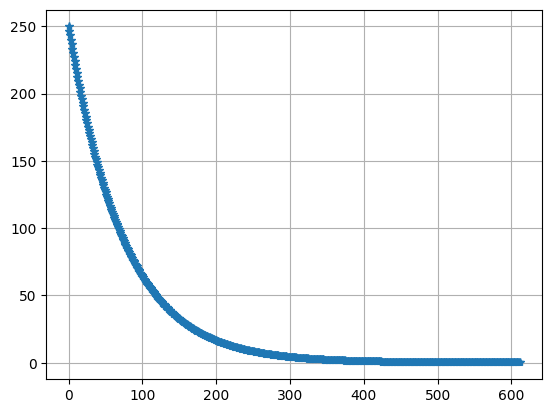

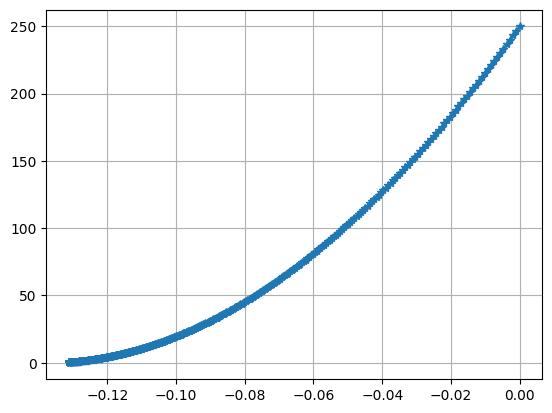

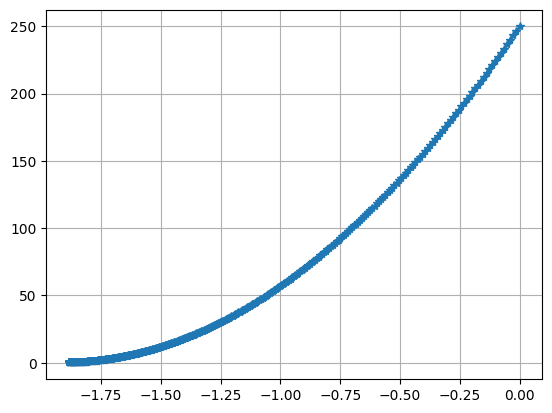

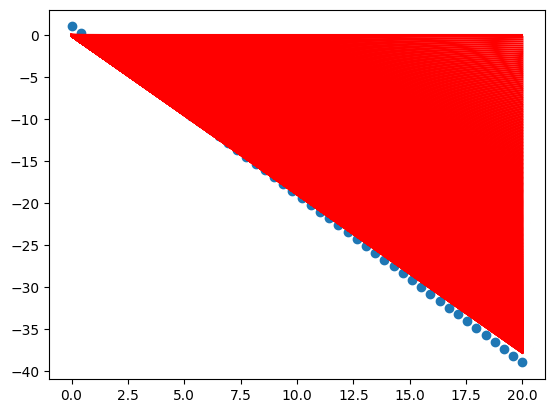

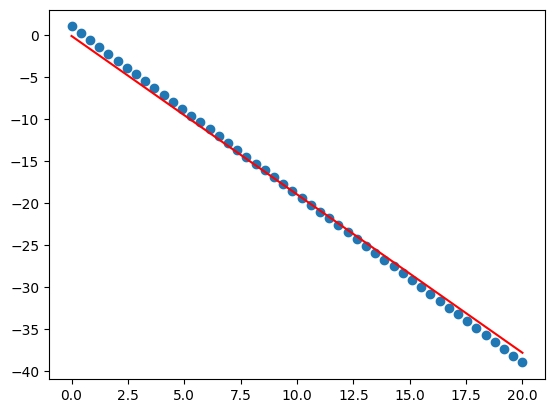

In [77]:
plt.plot(np.arange(len(cost_array)),cost_array,marker='*')
plt.grid(True)
plt.show();

w_array=np.array(w_array)

plt.plot(w_array[:,0],cost_array,marker='*')
plt.grid(True);
plt.show();

plt.plot(w_array[:,1],cost_array,marker='*')
plt.grid(True);
plt.show();

plt.scatter(X,y)
for i in y_predict_val:
  plt.plot(X,i,color='red')
plt.show();

plt.scatter(X,y)
plt.plot(X,y_predict,color='red')
plt.show();

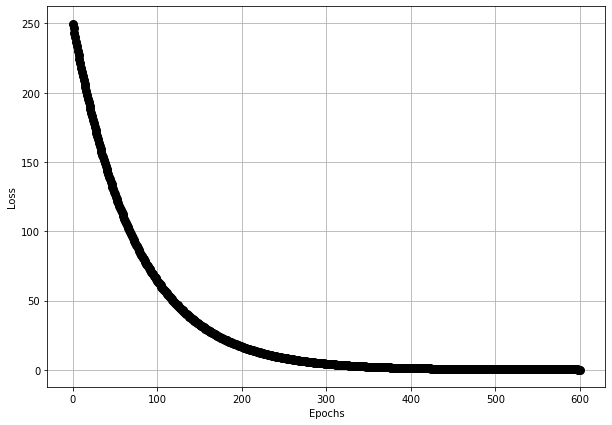

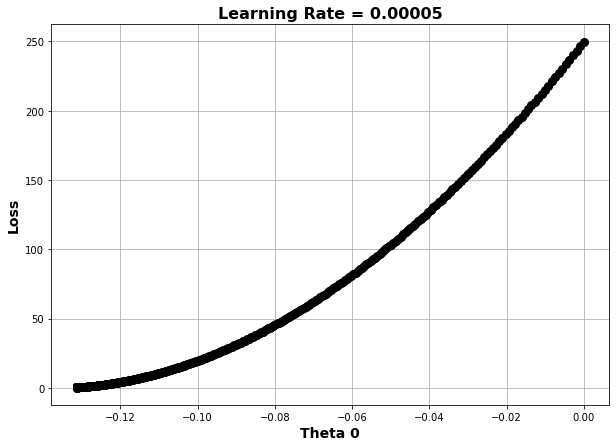

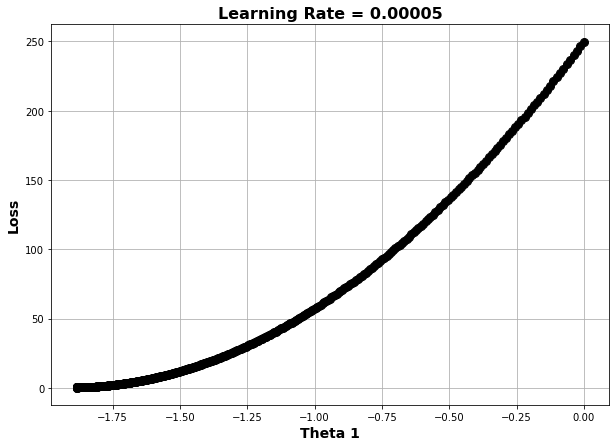

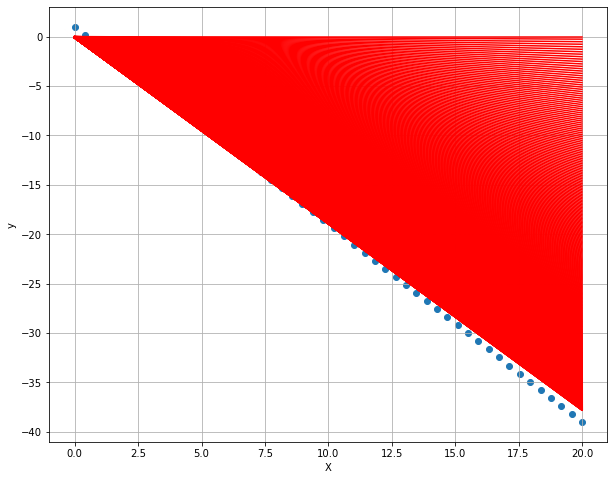

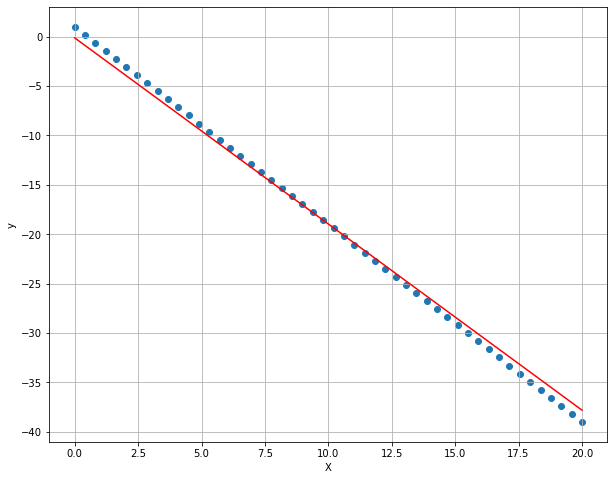

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [78]:
w_array,cost_array,y_predict_val,w_vector,y_predict = GD(X,y,0.005,300,0.001,0.001)

****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Error vector [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]


j= 249.88775510204087


Gradient Vector: [[ 19.       ]
 [259.3877551]]


Gradient Vector Norm: 260.08269357432516


theta_0: -0.095
theta_1: -1.2969387755102042


****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.095
theta_1_new : -1.296938775

In [80]:
r2_score(y,y_predict)

0.9976867059390216

r2_score: 0.9976200723230484


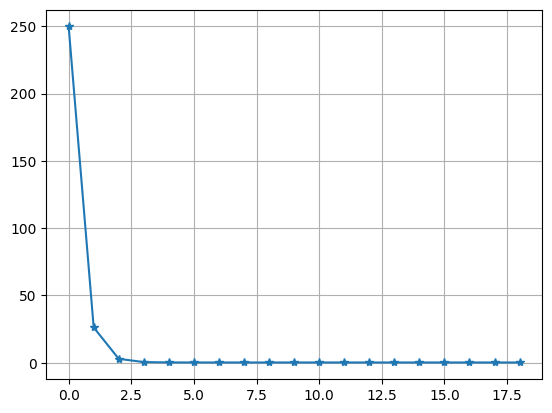

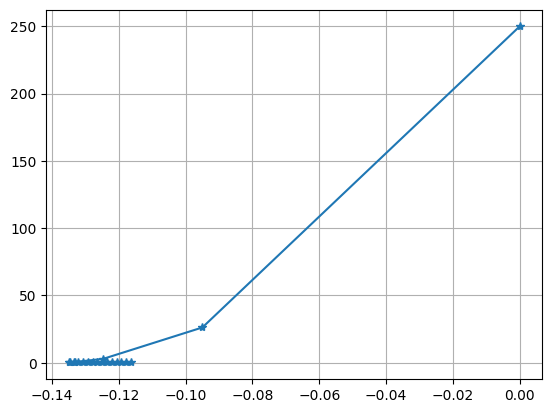

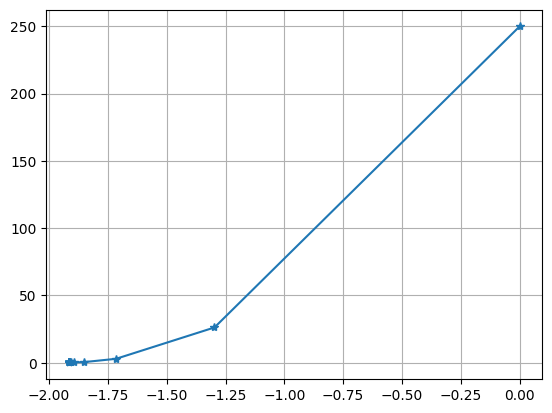

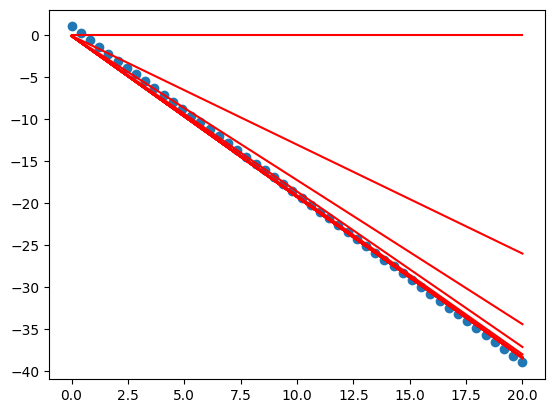

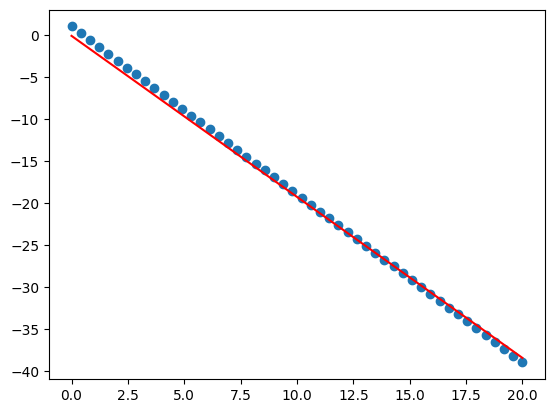

In [79]:
plt.plot(np.arange(len(cost_array)),cost_array,marker='*')
plt.grid(True)
plt.show();

w_array=np.array(w_array)

plt.plot(w_array[:,0],cost_array,marker='*')
plt.grid(True);
plt.show();

plt.plot(w_array[:,1],cost_array,marker='*')
plt.grid(True);
plt.show();

plt.scatter(X,y)
for i in y_predict_val:
  plt.plot(X,i,color='red')
plt.show();

plt.scatter(X,y)
plt.plot(X,y_predict,color='red')
plt.show();

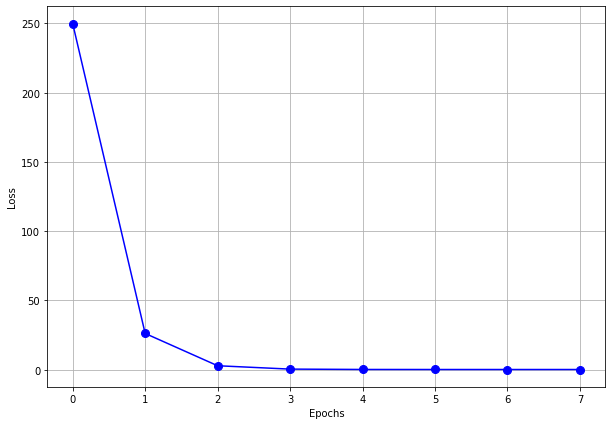

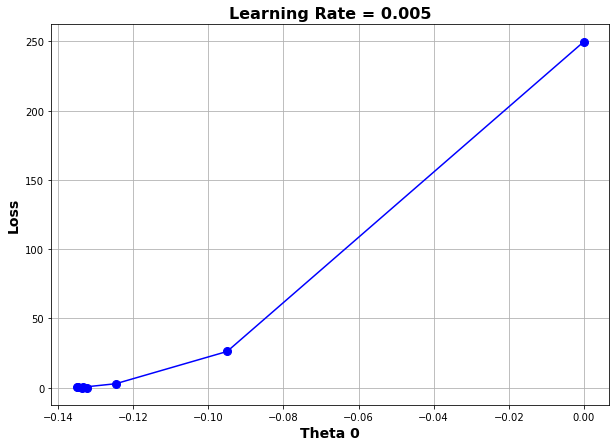

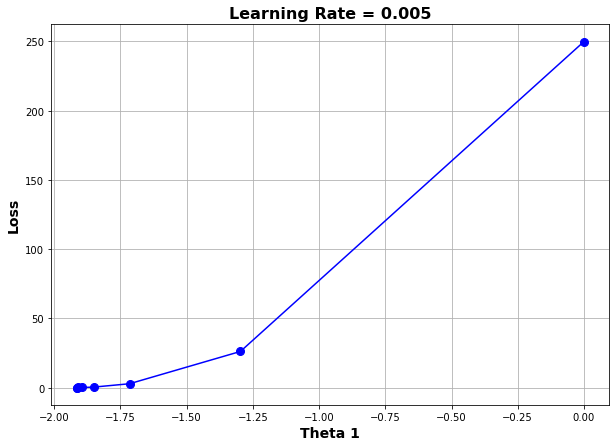

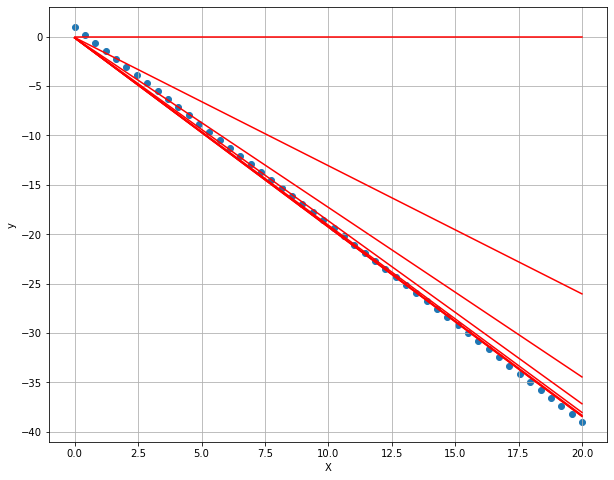

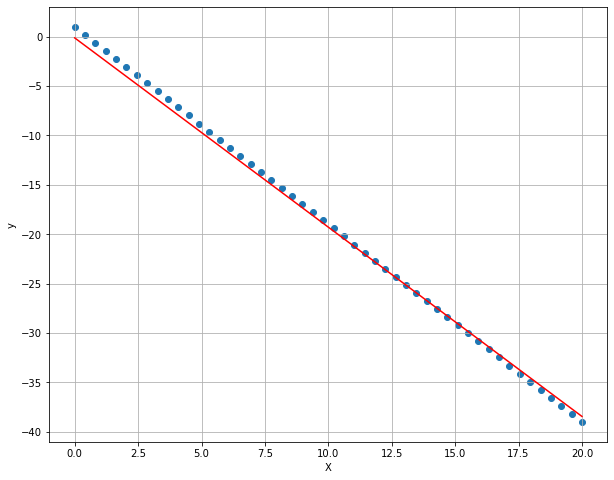

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [46]:
x = np.linspace(0,20)
a=-2
b=1
y=a*x+b
data_matrix = np.column_stack((x, y))
np.random.seed(42)
np.random.shuffle(data_matrix)
data_matrix
X = data_matrix[:,0]
y = data_matrix[:,1]

In [130]:
def SGD(x,y,alpha,gradient_tolerance,cost_tolerance,epochs):
  theta_1 = 0
  theta_0 = 0
  cost_array = []
  cost_itr=[]
  w_array = []
  y_predict_val = []
  max_itr = len(y)

  for i in range(epochs):
    for k in range(max_itr):
      y_predict = theta_0 + theta_1*X[k]
      error = y_predict - y[k]
      j = (1/2) * error**2
      cost_itr.append(j)
      w_array.append([[theta_0],[theta_1]])
      gradient_theta_0 =  error
      gradient_theta_1 =  error*X[k]
      theta_0 = theta_0 - (alpha*gradient_theta_0)
      theta_1 = theta_1 - (alpha*gradient_theta_1)
      gradient_vector = np.array([[gradient_theta_0],[gradient_theta_1]])
      norm_gradient = np.linalg.norm(gradient_vector)


    print('****************** epoch '+str(i)+' ********************')
    y_predict = theta_0 + theta_1*X
    error = y_predict-y
    print('cost = '+ str(j))
    print('')
    print('')
    print('Gradient Vector: '+str(gradient_vector))
    print('')
    print('')
    print('Gradient Vector Norm: '+str(norm_gradient))
    print('')
    print('')
    print('theta_0: '+str(theta_0))
    print('theta_1: '+str(theta_1))

    if norm_gradient<gradient_tolerance :
      print('converged!')
      break

    cost_array.append(j)

    if i>0:
      cost_conv = abs(cost_array[-1]-cost_array[-2])

      if cost_conv < cost_tolerance :
        print('converged!')
        break
  return w_array,cost_array,y_predict_val,w_vector,y_predict,cost_itr

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [132]:
w_array,cost_array,y_predict_val,w_vector,y_predict,cost_itr = SGD(X,y,0.0005,0.001,0.001,300)

****************** epoch 0 ********************
cost = 0.6057343237552777


Gradient Vector: [[ 1.10066736]
 [17.07157545]]


Gradient Vector Norm: 17.107020694095908


theta_0: -0.12753385324588895
theta_1: -1.864910928088219
****************** epoch 1 ********************
cost = 0.02238130493082408


Gradient Vector: [[0.21157176]
 [3.28152118]]


Gradient Vector Norm: 3.2883345162910587


theta_0: -0.12385001858621024
theta_1: -1.9155480189216496
****************** epoch 2 ********************
cost = 0.01739211788287657


Gradient Vector: [[0.18650532]
 [2.89273563]]


Gradient Vector Norm: 2.8987417402998346


theta_0: -0.11668620526405411
theta_1: -1.9174308210552682
****************** epoch 3 ********************
cost = 0.017050321123588008


Gradient Vector: [[0.18466359]
 [2.86417   ]]


Gradient Vector Norm: 2.8701167973892114


theta_0: -0.10947452417765854
theta_1: -1.9180001857373443
converged!


In [133]:
r2_score(y,y_predict)

0.9977151793507637

r2_score: 0.9976768960178554


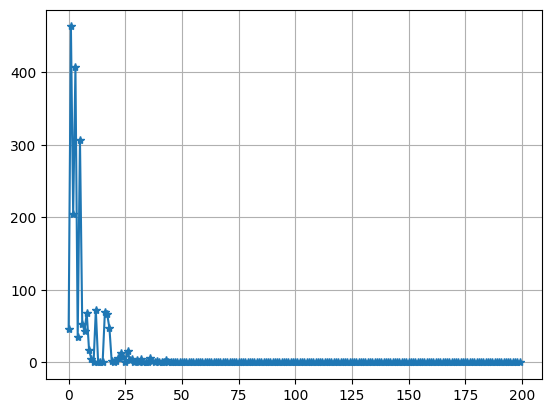

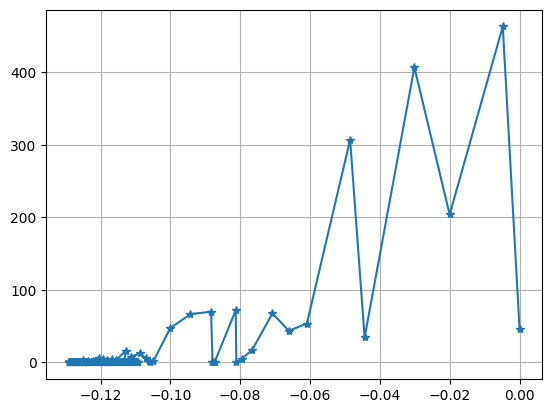

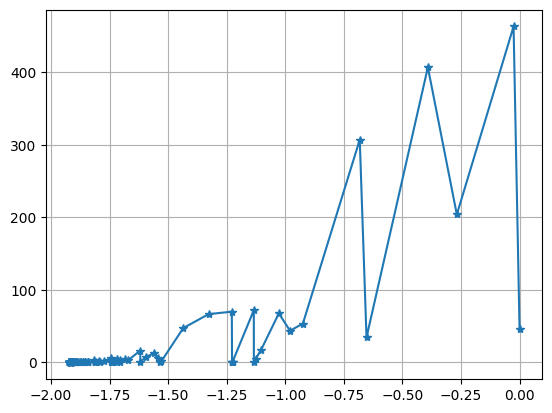

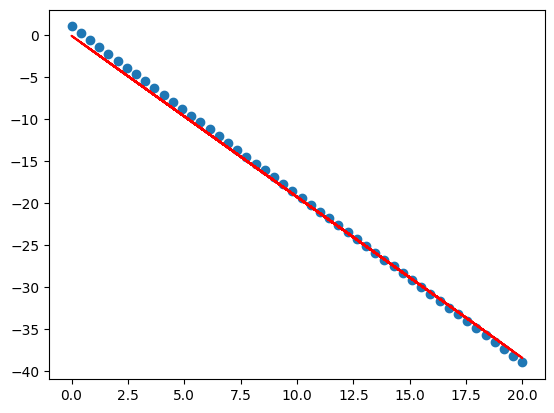

In [134]:
plt.plot(np.arange(len(cost_itr)),cost_itr,marker='*')
plt.grid(True)
plt.show()

w_array = np.array(w_array)
plt.plot(w_array[:,0],cost_itr,marker='*')
plt.grid(True)
plt.show();

plt.plot(w_array[:,1],cost_itr,marker='*')
plt.grid(True)
plt.show();

plt.scatter(X,y)
plt.plot(X,y_predict,color= 'red')
plt.show;

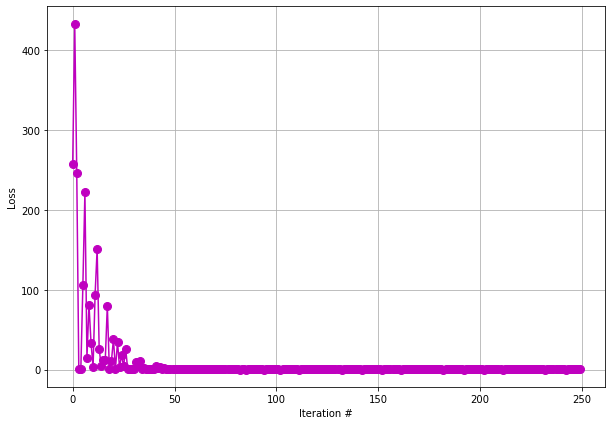

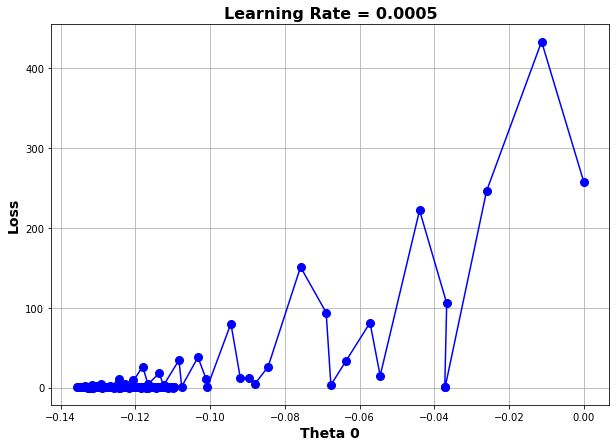

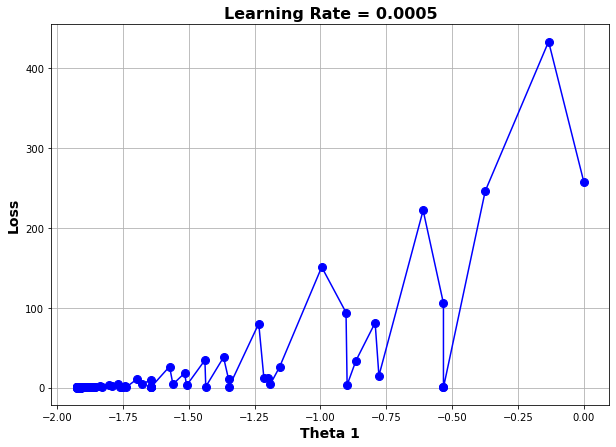

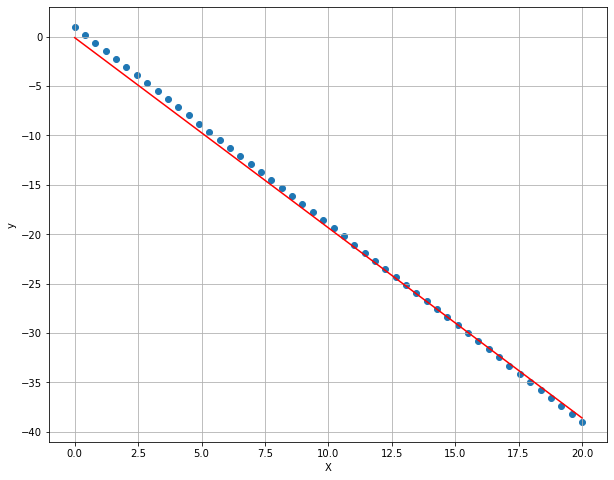

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [135]:
w_array,cost_array,y_predict_val,w_vector,y_predict,cost_itr = SGD(X,y,0.0001,0.001,0.001,300)

****************** epoch 0 ********************
cost = 121.46906548691264


Gradient Vector: [[ 15.58647269]
 [241.74937236]]


Gradient Vector Norm: 242.25130994295003


theta_0: -0.06887406422672956
theta_1: -0.9504438617999833
****************** epoch 1 ********************
cost = 31.5283087845174


Gradient Vector: [[  7.9408197 ]
 [123.16373418]]


Gradient Vector Norm: 123.41945565938693


theta_0: -0.10284450987285872
theta_1: -1.4292892201868765
****************** epoch 2 ********************
cost = 8.360635454425607


Gradient Vector: [[ 4.08916506]
 [63.42378464]]


Gradient Vector Norm: 63.55546970519521


theta_0: -0.11923299361908357
theta_1: -1.6705641313013402
****************** epoch 3 ********************
cost = 2.3085813499017505


Gradient Vector: [[ 2.14875841]
 [33.32768144]]


Gradient Vector Norm: 33.39687879338172


theta_0: -0.12676539549372723
theta_1: -1.7921615345932023
****************** epoch 4 ********************
cost = 0.6858005435839635


Gradient Vect

****************** Epoch 0 ********************

Cost = 16.887127834434082

Gradient Vector:
[[ 5.81156224]
 [37.95305953]]

Gradient Vector Norm:
38.39542919503344

theta_0_new : -0.06824518438278841
theta_1_new : -0.9465294881483106

****************** Epoch 1 ********************

Cost = 3.4768759637568025

Gradient Vector:
[[ 2.63699676]
 [17.22120335]]

Gradient Vector Norm:
17.421928616911465

theta_0_new : -0.10250915532081234
theta_1_new : -1.4273881562733521

****************** Epoch 2 ********************

Cost = 0.5388930377939929

Gradient Vector:
[[1.03816476]
 [6.77985151]]

Gradient Vector Norm:
6.858875464652135

theta_0_new : -0.11904557794809867
theta_1_new : -1.6696771665089043

****************** Epoch 3 ********************

Cost = 0.027171708479479032

Gradient Vector:
[[0.23311675]
 [1.52239507]]

Gradient Vector Norm:
1.5401396595959387

theta_0_new : -0.1266525793929906
theta_1_new : -1.791785322149918

****************** Epoch 4 ********************

Cost = 0.

In [136]:
r2_score(y,y_predict)

0.9976598261722555

r2_score =  0.9976210193556192


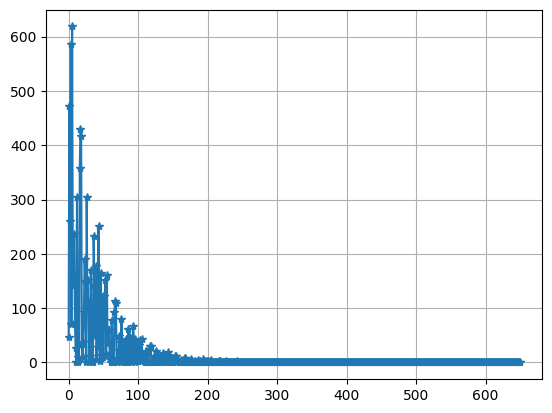

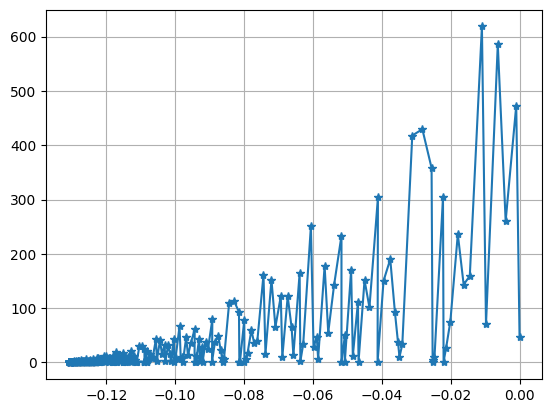

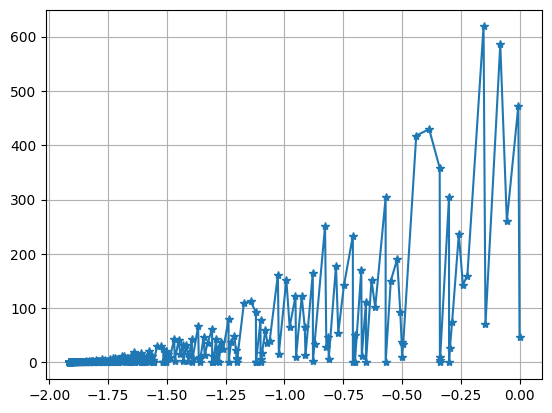

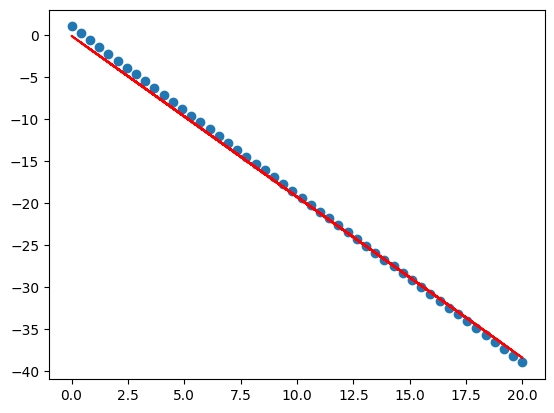

In [137]:
plt.plot(np.arange(len(cost_itr)),cost_itr,marker='*')
plt.grid(True)
plt.show()

w_array = np.array(w_array)
plt.plot(w_array[:,0],cost_itr,marker='*')
plt.grid(True)
plt.show();

plt.plot(w_array[:,1],cost_itr,marker='*')
plt.grid(True)
plt.show();

plt.scatter(X,y)
plt.plot(X,y_predict,color= 'red')
plt.show;

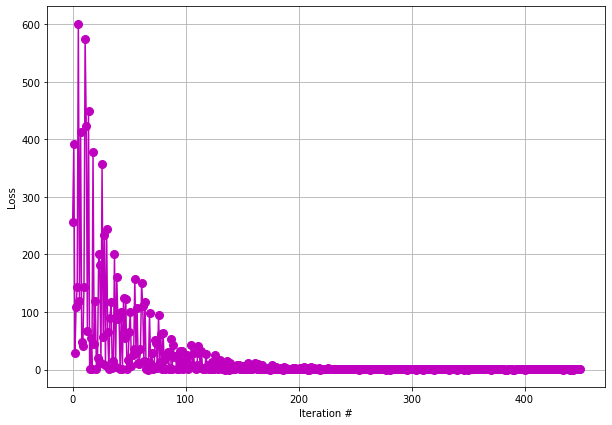

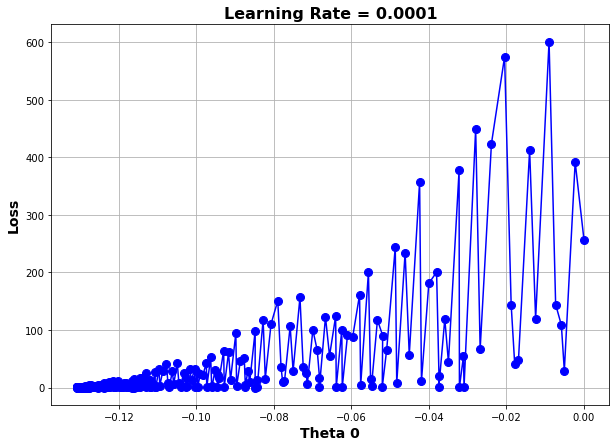

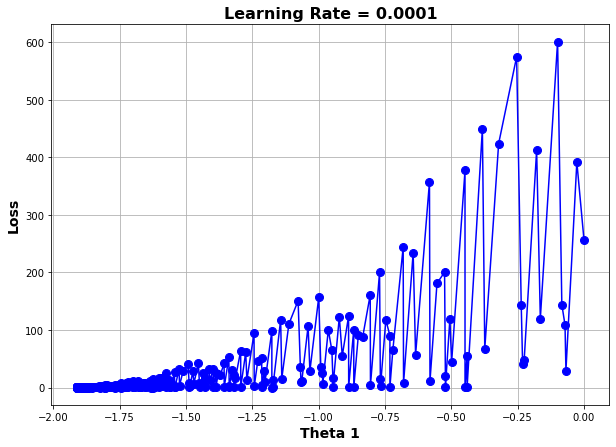

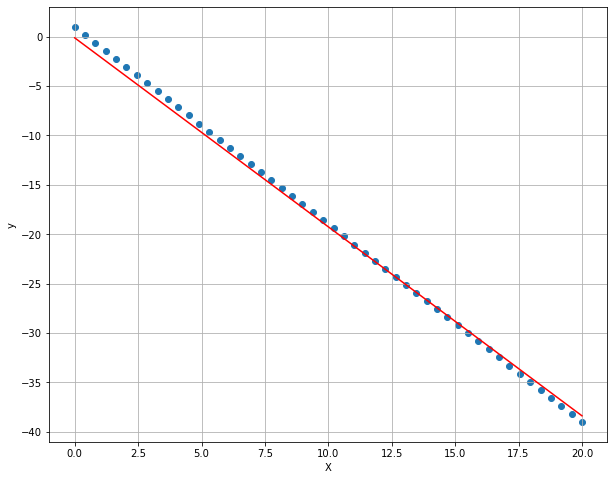

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [138]:
w_array,cost_array,y_predict_val,w_vector,y_predict,cost_itr = SGD(X,y,0.00007,0.001,0.001,300)

****************** epoch 0 ********************
cost = 180.4669418118103


Gradient Vector: [[ 18.99826002]
 [294.66689004]]


Gradient Vector Norm: 295.2786988067478


theta_0: -0.052931530335797256
theta_1: -0.7279382326669247
****************** epoch 1 ********************
cost = 70.15450159572595


Gradient Vector: [[ 11.84521014]
 [183.72162662]]


Gradient Vector Norm: 184.10308278126385


theta_0: -0.08535623130548851
theta_1: -1.1792327204685726
****************** epoch 2 ********************
cost = 27.46005276567093


Gradient Vector: [[  7.41081005]
 [114.94317622]]


Gradient Vector Norm: 115.18182957542153


theta_0: -0.10506862865907968
theta_1: -1.4590293960744196
****************** epoch 3 ********************
cost = 10.866018095744394


Gradient Vector: [[ 4.66176321]
 [72.30489871]]


Gradient Vector Norm: 72.45502338429817


theta_0: -0.1169007269111523
theta_1: -1.632510628595342
****************** epoch 4 ********************
cost = 4.373419268563169


Gradient Vect

****************** Epoch 0 ********************

Cost = 124.0437076336173

Gradient Vector:
[[ 15.75079094]
 [205.72461637]]

Gradient Vector Norm:
206.32669530819234

theta_0_new : -0.051948440276973804
theta_1_new : -0.7135402661206246

****************** Epoch 1 ********************

Cost = 47.548348470307104

Gradient Vector:
[[  9.75175353]
 [127.36984205]]

Gradient Vector Norm:
127.7426058898493

theta_0_new : -0.0848670753436601
theta_1_new : -1.1703212347826775

****************** Epoch 2 ********************

Cost = 18.197486942756615

Gradient Vector:
[[ 6.0328247 ]
 [78.79607774]]

Gradient Vector Norm:
79.02668436189794

theta_0_new : -0.10488561670446958
theta_1_new : -1.453519053721322

****************** Epoch 3 ********************

Cost = 6.946707513134106

Gradient Vector:
[[ 3.72738716]
 [48.68424043]]

Gradient Vector Norm:
48.826720978186586

theta_0_new : -0.11690744458248394
theta_1_new : -1.6291086944831552

****************** Epoch 4 ********************

Cost

In [139]:
r2_score(y,y_predict)

0.9976564025390153

r2_score =  0.997655146572521


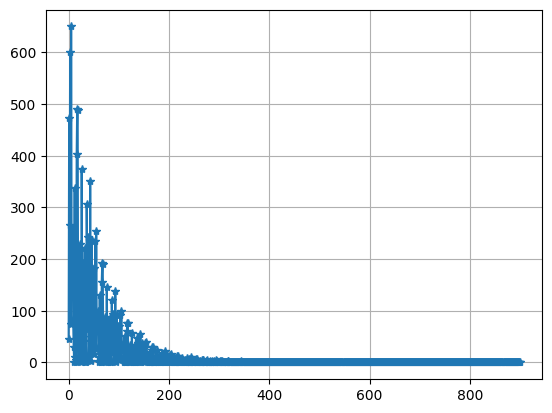

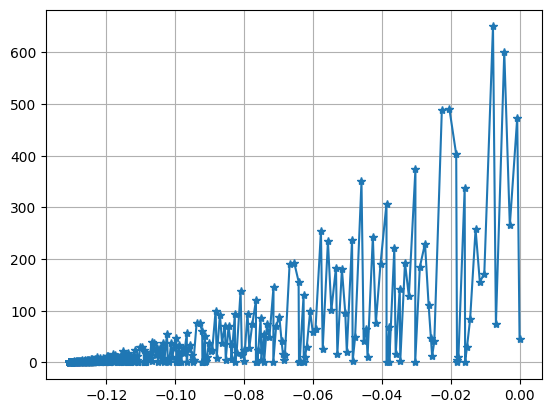

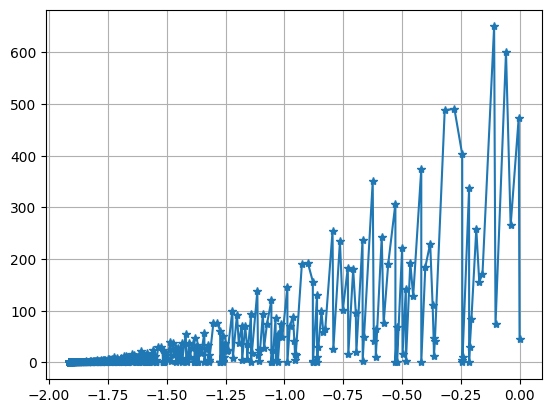

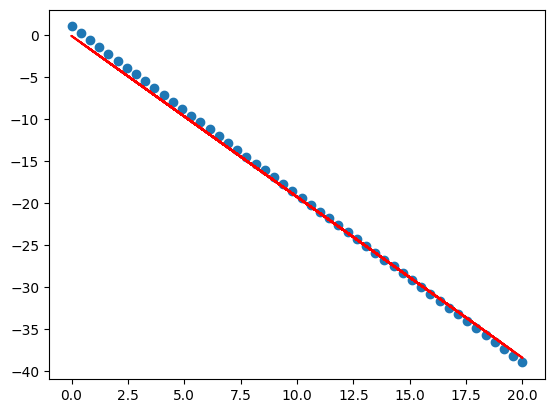

In [140]:
plt.plot(np.arange(len(cost_itr)),cost_itr,marker='*')
plt.grid(True)
plt.show()

w_array = np.array(w_array)
plt.plot(w_array[:,0],cost_itr,marker='*')
plt.grid(True)
plt.show();

plt.plot(w_array[:,1],cost_itr,marker='*')
plt.grid(True)
plt.show();

plt.scatter(X,y)
plt.plot(X,y_predict,color= 'red')
plt.show();

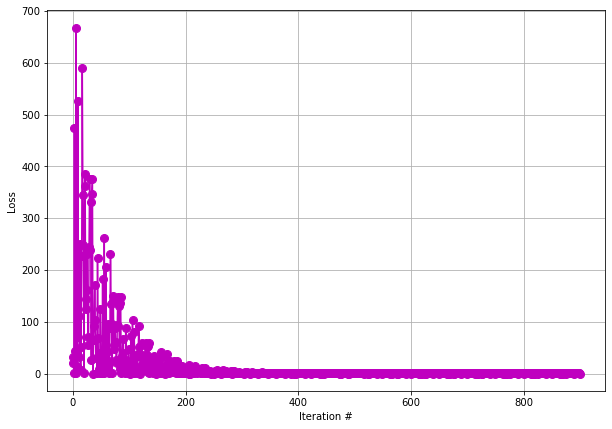

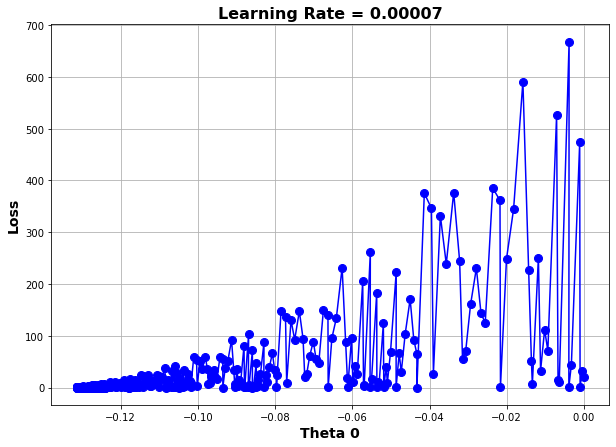

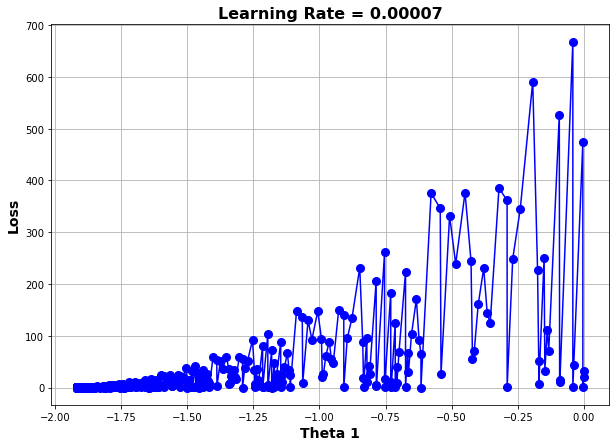

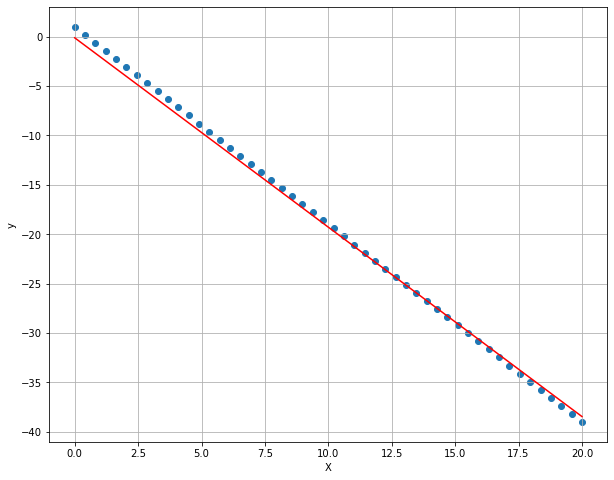

In [143]:
len(y)

50

In [142]:
batches = np.array_split(X, len(X) // 5)
batches

[array([ 5.30612245, 15.91836735, 12.24489796, 18.36734694,  6.93877551]),
 array([19.59183673, 10.6122449 , 10.20408163, 13.06122449,  7.75510204]),
 array([ 4.89795918,  1.63265306, 15.10204082,  3.26530612,  1.2244898 ]),
 array([ 2.44897959, 16.73469388, 18.7755102 , 19.18367347,  6.12244898]),
 array([ 3.67346939,  6.53061224,  9.79591837, 13.87755102, 12.65306122]),
 array([ 0.        , 17.95918367, 11.02040816, 13.46938776,  2.04081633]),
 array([11.83673469,  4.48979592, 14.69387755,  0.40816327,  8.57142857]),
 array([ 0.81632653, 17.55102041, 14.28571429,  9.3877551 , 16.32653061]),
 array([ 4.08163265,  8.97959184,  7.34693878, 20.        ,  8.16326531]),
 array([ 2.85714286, 17.14285714,  5.71428571, 11.42857143, 15.51020408])]

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [43]:
def mini_batch_GD(x,y,alpha,gradient_tolerance,cost_tolerance,epochs,batch_size):
  theta_1 = 0
  theta_0 = 0
  cost_array = []
  cost_itr=[]
  w_array = []
  y_predict_val = []
  cost_itr = []
  batches = np.array_split(x, len(x) // batch_size)
  result = np.array_split(y, len(y) // batch_size)

  for i in range(epochs):
    for (k,m) in zip(batches,result):
      y_predict = theta_0 + theta_1*k
      y_predict_val.append(y_predict)
      error = y_predict - m
      j = 1/(2*len(k)) * np.sum(error**2)
      cost_itr.append(j)
      w_array.append([[theta_0],[theta_1]])
      w_vector = [[theta_0],[theta_1]]
      gradient_theta_0 = 1/len(k) * np.sum(error)
      gradient_theta_1 = 1/len(k)* np.dot(error,k)
      theta_0 = theta_0 - (alpha*gradient_theta_0)
      theta_1 = theta_1 - (alpha*gradient_theta_1)
      gradient_vector = np.array([[gradient_theta_0],[gradient_theta_1]])
      norm_gradient = np.linalg.norm(gradient_vector)

    y_predict = theta_0 + theta_1*x

    print('****************** epoch '+str(i)+' ********************')
    cost_array.append(j)
    print('cost = '+ str(j))
    print('')
    print('')
    print('Gradient Vector: '+str(gradient_vector))
    print('')
    print('')
    print('Gradient Vector Norm: '+str(norm_gradient))
    print('')
    print('')
    print('theta_0: '+str(theta_0))
    print('theta_1: '+str(theta_1))



    if norm_gradient<gradient_tolerance :
      print('converged!')
      break


    if i>0:
      cost_conv = abs(cost_array[-1]-cost_array[-2])

      if cost_conv < cost_tolerance :
        print('converged!')
        break

  return w_array,cost_array,y_predict_val,w_vector,y_predict,cost_itr

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [47]:
w_array,cost_array,y_predict_val,w_vector,y_predict,cost_itr = mini_batch_GD(X,y,0.0005,0.001,0.001,300,5)

****************** epoch 0 ********************
cost = 74.29116816731101


Gradient Vector: [[ 10.56609266]
 [144.71245929]]


Gradient Vector Norm: 145.09768498799662


theta_0: -0.07024581326687265
theta_1: -0.967856780263086
****************** epoch 1 ********************
cost = 18.270959395323963


Gradient Vector: [[ 5.10218584]
 [71.56838885]]


Gradient Vector Norm: 71.75002845099468


theta_0: -0.10425432757566
theta_1: -1.4466551933307552
****************** epoch 2 ********************
cost = 4.569703535900382


Gradient Vector: [[ 2.3996626 ]
 [35.38821186]]


Gradient Vector Norm: 35.46947870151644


theta_0: -0.12033926663266412
theta_1: -1.6835443001644321
****************** epoch 3 ********************
cost = 1.2198768270240299


Gradient Vector: [[ 1.06303787]
 [17.49196131]]


Gradient Vector Norm: 17.524233503696216


theta_0: -0.12755938213199236
theta_1: -1.8007746224040087
****************** epoch 4 ********************
cost = 0.4013599884305779


Gradient Vector: [

In [48]:
r2_score(y,y_predict)

0.9976380395728581

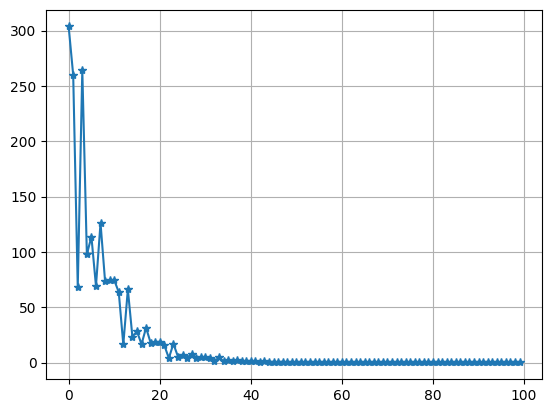

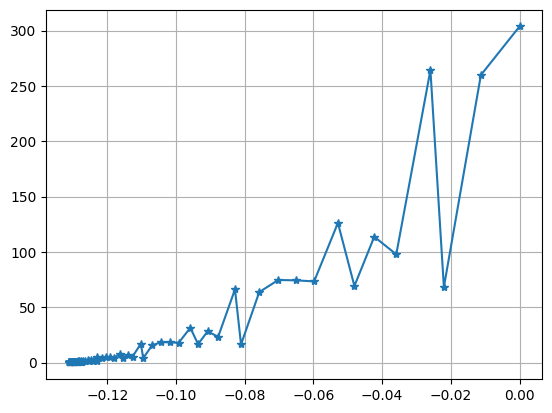

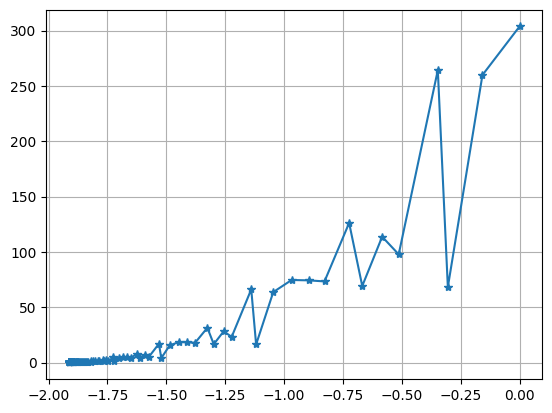

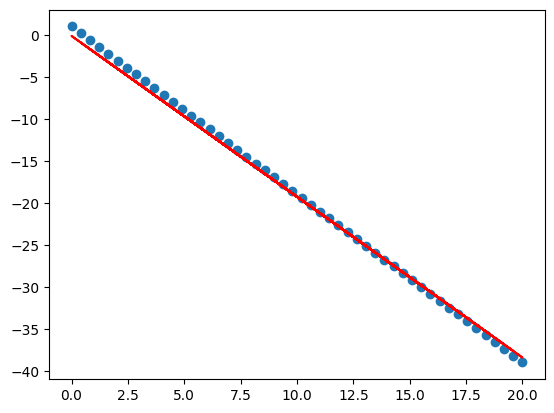

In [49]:
plt.plot(np.arange(len(cost_itr)),cost_itr,marker='*')
plt.grid(True)
plt.show()

w_array = np.array(w_array)
plt.plot(w_array[:,0],cost_itr,marker='*')
plt.grid(True)
plt.show();

plt.plot(w_array[:,1],cost_itr,marker='*')
plt.grid(True)
plt.show();

plt.scatter(X,y)
plt.plot(X,y_predict,color= 'red')
plt.show();

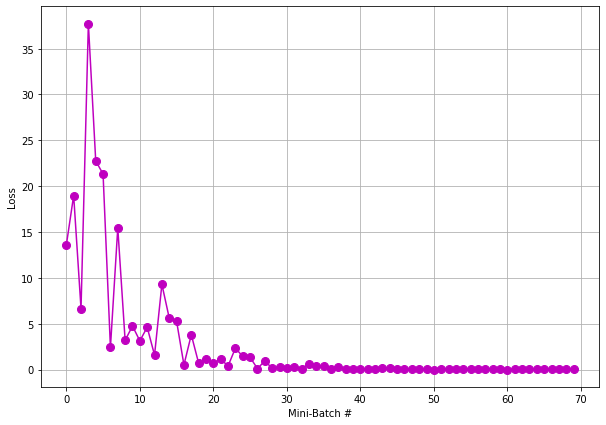

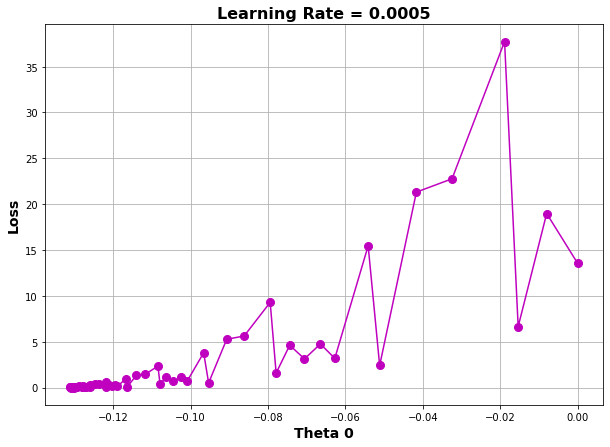

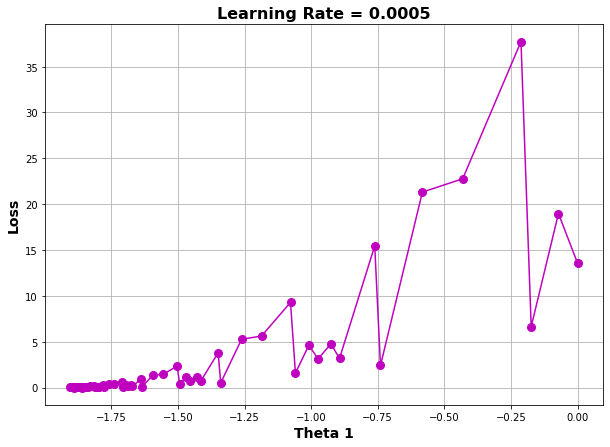

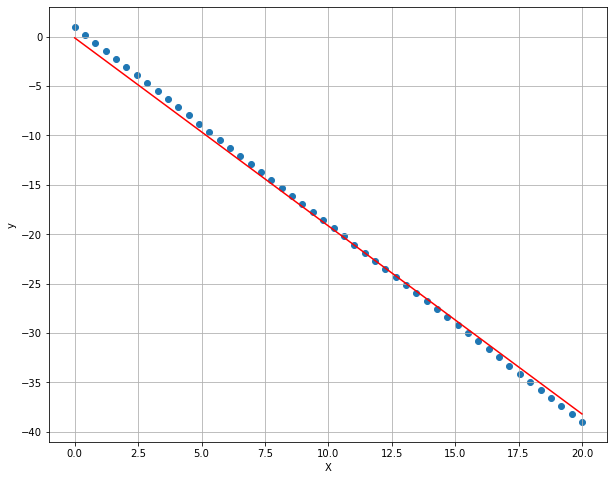

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [50]:
w_array,cost_array,y_predict_val,w_vector,y_predict,cost_itr = mini_batch_GD(X,y,0.0005,0.001,0.001,300,10)

****************** epoch 0 ********************
cost = 139.34179965527267


Gradient Vector: [[ 14.44695585]
 [191.98864238]]


Gradient Vector Norm: 192.5314346705448


theta_0: -0.04130007960323388
theta_1: -0.5666181316533923
****************** epoch 1 ********************
cost = 69.05867779144114


Gradient Vector: [[ 10.08925634]
 [135.09177068]]


Gradient Vector Norm: 135.46800212644794


theta_0: -0.07016436858944254
theta_1: -0.9656014743660061
****************** epoch 2 ********************
cost = 34.242631714822906


Gradient Vector: [[ 7.02096556]
 [95.02959549]]


Gradient Vector Norm: 95.28860360629625


theta_0: -0.09027250513959524
theta_1: -1.2465497745476364
****************** epoch 3 ********************
cost = 17.0019303773428


Gradient Vector: [[ 4.86057341]
 [66.82106924]]


Gradient Vector Norm: 66.99761539672294


theta_0: -0.104215396541785
theta_1: -1.4443872129348316
****************** epoch 4 ********************
cost = 8.46869850758354


Gradient Vector: [

****************** Epoch 0 ********************

Cost = 22.539550396010963

Gradient Vector:
[[ 11.67472803]
 [157.10281459]]

Gradient Vector Norm:
157.53600739932955

theta_0_new : -0.03545598365437756
theta_1_new : -0.48835190145126706

****************** Epoch 1 ********************

Cost = 11.174953219348621

Gradient Vector:
[[  8.09250368]
 [110.51346525]]

Gradient Vector Norm:
110.80936160035174

theta_0_new : -0.06610051885857628
theta_1_new : -0.9107485292034476

****************** Epoch 2 ********************

Cost = 5.548346857077597

Gradient Vector:
[[ 5.57078759]
 [77.71577392]]

Gradient Vector Norm:
77.91517946195926

theta_0_new : -0.0874575404445202
theta_1_new : -1.2081213319692865

****************** Epoch 3 ********************

Cost = 2.763748611613035

Gradient Vector:
[[ 3.7956429 ]
 [54.62706716]]

Gradient Vector Norm:
54.75877438231161

theta_0_new : -0.10227652151342273
theta_1_new : -1.4174804576423325

****************** Epoch 4 ********************

Cos

In [51]:
r2_score(y,y_predict)

0.9976210516087978

r2_score 0.9976302004574656


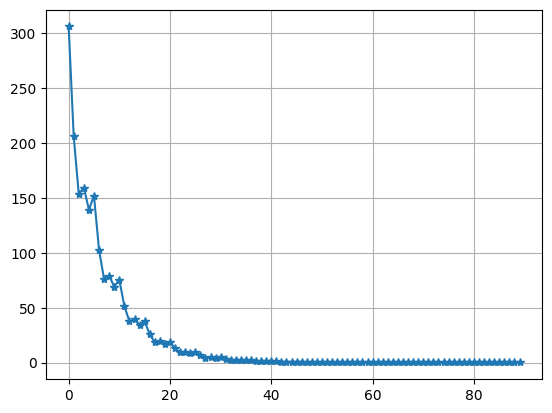

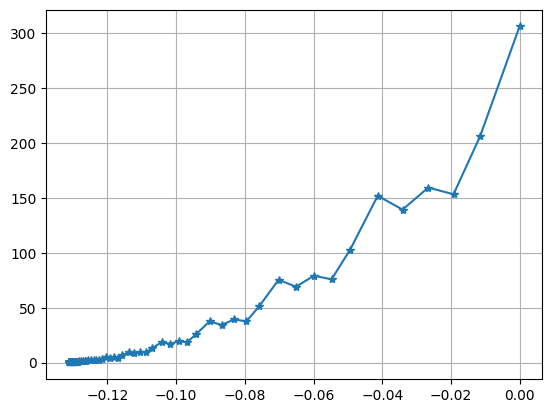

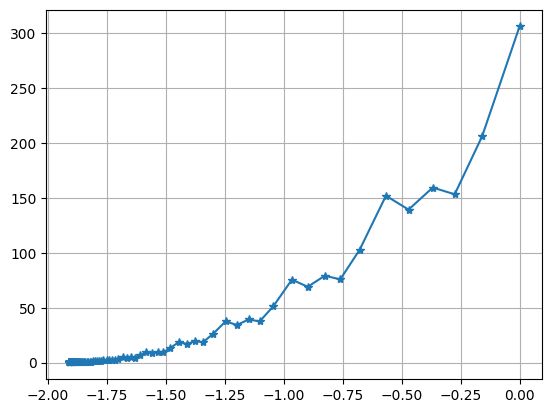

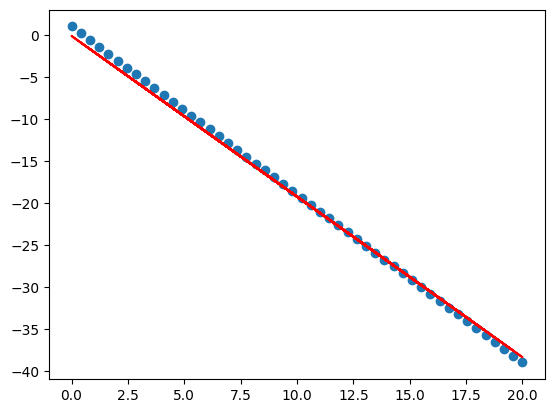

In [52]:
plt.plot(np.arange(len(cost_itr)),cost_itr,marker='*')
plt.grid(True)
plt.show()

w_array = np.array(w_array)
plt.plot(w_array[:,0],cost_itr,marker='*')
plt.grid(True)
plt.show();

plt.plot(w_array[:,1],cost_itr,marker='*')
plt.grid(True)
plt.show();

plt.scatter(X,y)
plt.plot(X,y_predict,color= 'red')
plt.show();

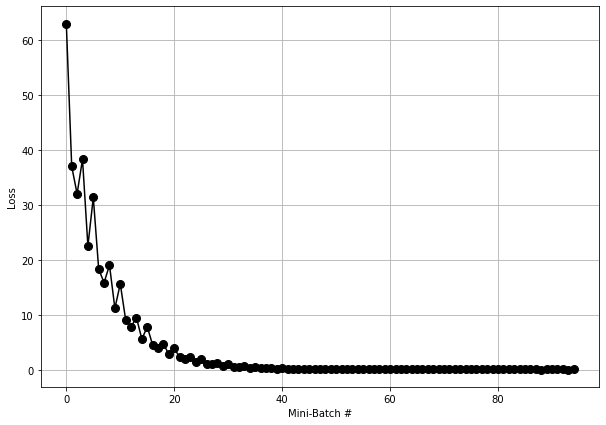

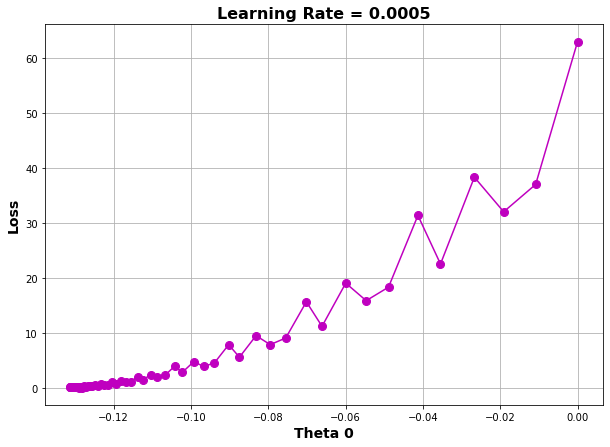

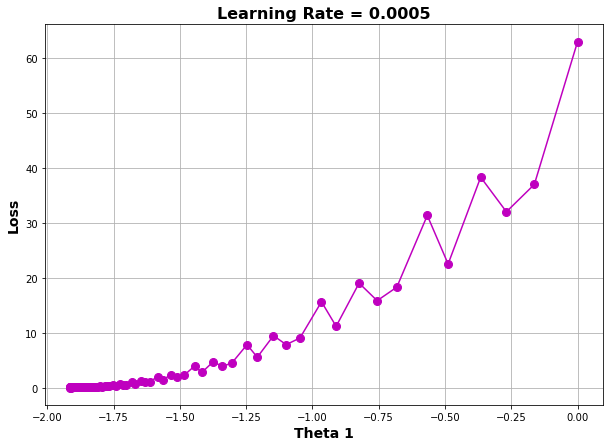

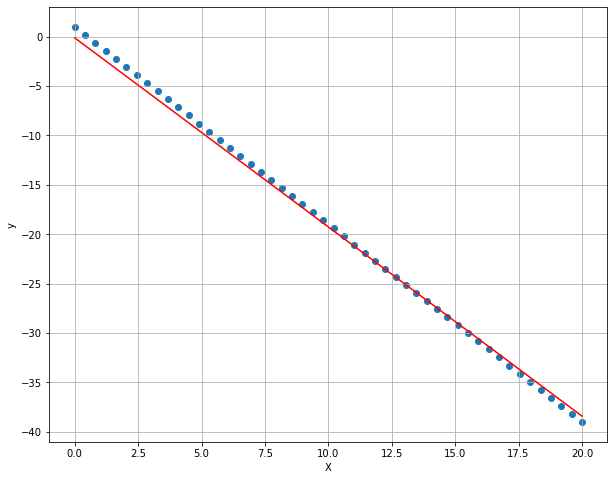

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [53]:
w_array,cost_array,y_predict_val,w_vector,y_predict,cost_itr = mini_batch_GD(X,y,0.0005,0.001,0.001,300,20)

****************** epoch 0 ********************
cost = 210.00873735495517


Gradient Vector: [[ 17.21394569]
 [234.33478782]]


Gradient Vector Norm: 234.96619482074357


theta_0: -0.018343707540990573
theta_1: -0.2506112922851769
****************** epoch 1 ********************
cost = 158.67380827209215


Gradient Vector: [[ 14.92054202]
 [203.66571977]]


Gradient Vector Norm: 204.21152755038923


theta_0: -0.03424882073575708
theta_1: -0.468431526475867
****************** epoch 2 ********************
cost = 119.89640879930661


Gradient Vector: [[ 12.92725362]
 [177.00987358]]


Gradient Vector Norm: 177.48129261825417


theta_0: -0.04803445319978143
theta_1: -0.6577515967714833
****************** epoch 3 ********************
cost = 90.60490190277551


Gradient Vector: [[ 11.19480872]
 [153.84209651]]


Gradient Vector Norm: 154.24887163682416


theta_0: -0.05997796072931618
theta_1: -0.8223009096604801
****************** epoch 4 ********************
cost = 68.47896453823661


Gradie

****************** Epoch 0 ********************

Cost = 126.24663174567475

Gradient Vector:
[[ 17.2116263 ]
 [234.92496791]]

Gradient Vector Norm:
235.5546234500846

theta_0_new : -0.009846938775510204
theta_1_new : -0.13470991253644315

****************** Epoch 1 ********************

Cost = 95.2117173776487

Gradient Vector:
[[ 14.90431582]
 [203.99105181]]

Gradient Vector Norm:
204.53480840347603

theta_0_new : -0.026985858149656733
theta_1_new : -0.369149480457521

****************** Epoch 2 ********************

Cost = 71.8119173096046

Gradient Vector:
[[ 12.90081071]
 [177.13009011]]

Gradient Vector Norm:
177.5992672864237

theta_0_new : -0.041830281557401115
theta_1_new : -0.5727240764439553

****************** Epoch 3 ********************

Cost = 54.168934578029884

Gradient Vector:
[[ 11.16111006]
 [153.80581204]]

Gradient Vector Norm:
154.21024024297918

theta_0_new : -0.05468232631950523
theta_1_new : -0.7494975760087796

****************** Epoch 4 ********************

In [54]:
r2_score(y,y_predict)

0.997591314147794

r2_score 0.9975575226128095


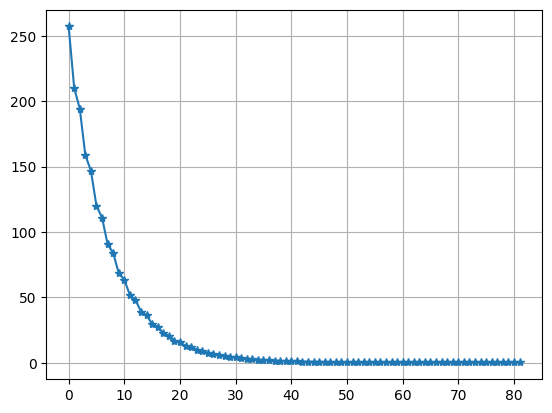

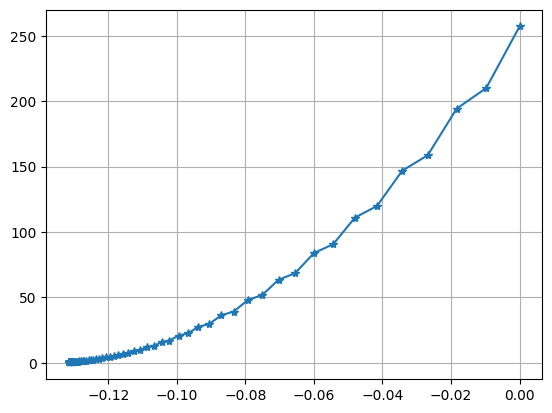

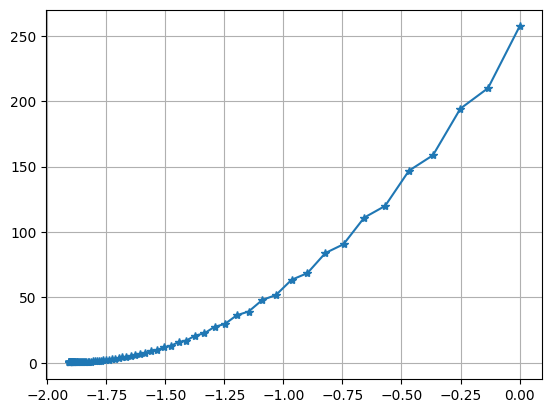

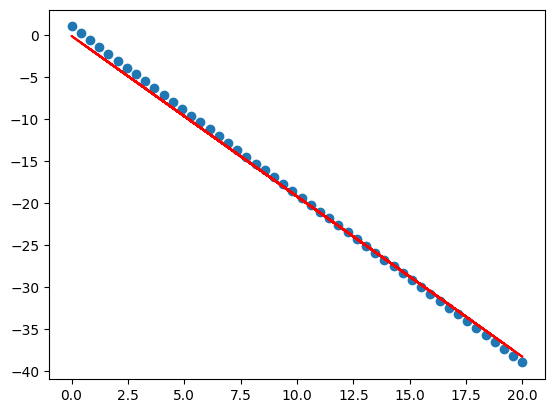

In [55]:
plt.plot(np.arange(len(cost_itr)),cost_itr,marker='*')
plt.grid(True)
plt.show()

w_array = np.array(w_array)
plt.plot(w_array[:,0],cost_itr,marker='*')
plt.grid(True)
plt.show();

plt.plot(w_array[:,1],cost_itr,marker='*')
plt.grid(True)
plt.show();

plt.scatter(X,y)
plt.plot(X,y_predict,color= 'red')
plt.show();

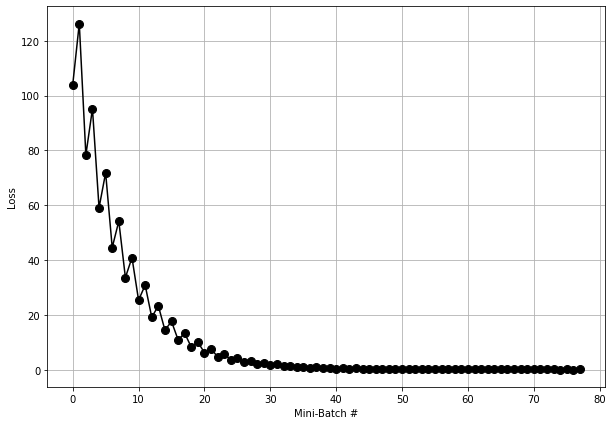

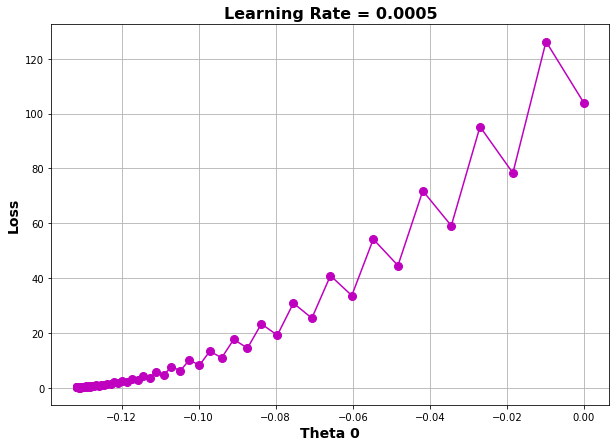

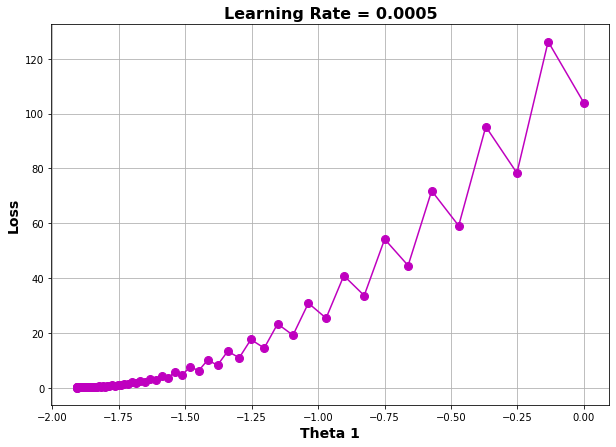

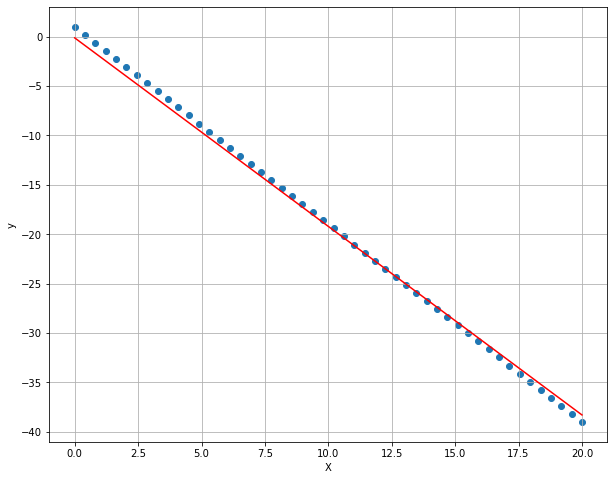